<a href="https://colab.research.google.com/github/PRANAY1258/guvi-/blob/main/Copy_of_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
df.head()

,Chirps_Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df.isnull().sum()

Chirps_Second         0
Ground_Temperature    0
dtype: int64

In [ ]:
df.drop_duplicates()
df.shape

(15, 2)

In [ ]:
df.dtypes

Chirps_Second         float64
Ground_Temperature    float64
dtype: object

In [ ]:
df.describe()

,Chirps_Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
irq = df.Chirps_Second.quantile(0.75) - df.Chirps_Second.quantile(0.25)
upper_threshold =  df.Chirps_Second.quantile(0.75) + (1.5 * irq)
lower_threshold =  df.Chirps_Second.quantile(0.25) - (1.5 * irq)
upper_threshold ,lower_threshold

(19.699999999999996, 12.9)

In [ ]:
irq = df.Ground_Temperature.quantile(0.75) - df.Ground_Temperature.quantile(0.25)
upper_threshold =  df.Ground_Temperature.quantile(0.75) + (1.5 * irq)
lower_threshold =  df.Ground_Temperature.quantile(0.25) - (1.5 * irq)
upper_threshold,lower_threshold

(98.4, 58.400000000000006)

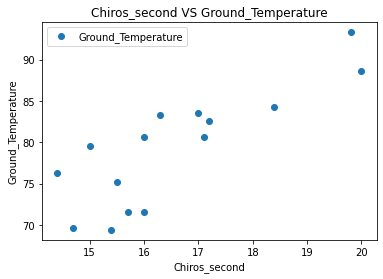

In [ ]:
df.plot(x = 'Chirps_Second', y = 'Ground_Temperature' ,style = 'o')
plt.title('Chiros_second VS Ground_Temperature' )
plt.xlabel('Chiros_second')
plt.ylabel('Ground_Temperature')
plt.show()

In [ ]:
df.corr()

,Chirps_Second,Ground_Temperature
Chirps_Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


In [ ]:
X = df.loc[:,['Chirps_Second']].values #array of features
y = df.loc[:,'Ground_Temperature'].values #array of targets

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y , test_size=0.3)

In [ ]:
X_test

array([[17.2],
       [16.3],
       [14.7],
       [17.1],
       [19.8]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
regresor = LinearRegression()
regresor.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regresor.coef_,['Chirps_Second'],columns =['coefficient'])
y_pred =regresor.predict(X_test_scaled)
coeff_df

,coefficient
Chirps_Second,4.500728


In [ ]:
print(regresor.intercept_) # c

78.07


In [ ]:
regresor.coef_ # slope - m

# predicted score  = 3.29 * (hours) + 76.82

array([4.50072765])

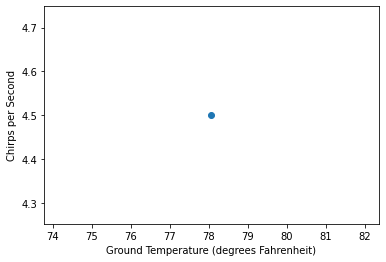

In [ ]:
plt.scatter(regresor.intercept_,regresor.coef_)
plt.plot(regresor.intercept_,regresor.coef_ ,  'r')
plt.xlabel('Ground Temperature (degrees Fahrenheit)')
plt.ylabel('Chirps per Second')
plt.show()

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,82.6,80.476763
1,83.3,77.958058
2,69.7,73.480359
3,80.6,80.196907
4,93.3,87.753024


In [ ]:
regresor.predict([[18]])

array([159.08309764])

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7233794114832034


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")
df


,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
df.to_csv('/content/brain_body.txt',index =None)


In [ ]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [ ]:
df.drop_duplicates()
df.shape

(62, 2)

In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
iqr = df.Body.quantile(0.75) - df.Body.quantile(0.25)
upper_threshold = df.Body.quantile(0.75) + (1.5*iqr)
lower_threshold = df.Body.quantile(0.25) - (1.5*iqr)
upper_threshold ,lower_threshold

(408.625, -238.375)

In [ ]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [ ]:
df.Body =df.Body.clip(-238,408.25) 

In [ ]:
iqr = df.Brain.quantile(0.75) - df.Brain.quantile(0.25)
upper_threshold = df.Brain.quantile(0.75) + (1.5*iqr)
lower_threshold = df.Brain.quantile(0.25) - (1.5*iqr)
upper_threshold

119.60625

In [ ]:
lower_threshold

-70.80375000000001

In [ ]:
df.Brain =df.Brain.clip(-70.8,119.606)

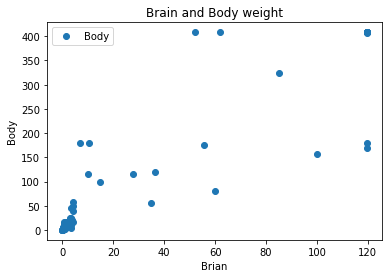

In [ ]:
df.plot(x='Brain',y='Body',style ='o')
plt.title('Brain and Body weight')
plt.xlabel('Brian')
plt.ylabel('Body')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


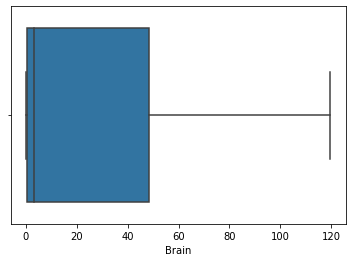

In [ ]:
import seaborn as sns
sns.boxplot(df['Brain'])

In [ ]:
X =  df[['Brain']].values
y = df['Body'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regresor = LinearRegression()
regresor.fit(X_train_scaled,y_train)


LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regresor.coef_,['Brain'],columns= ['coefficient'])
y_pred =regresor.predict(X_test_scaled)
coeff_df

,coefficient
Brain,130.344328


In [ ]:
regresor.intercept_ # c

103.22130434782606

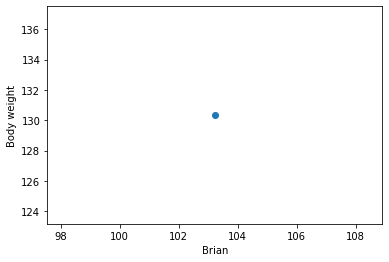

In [ ]:
plt.scatter(regresor.intercept_,regresor.coef_)
plt.plot(regresor.intercept_,regresor.coef_ ,  'r')
plt.xlabel('Brian')
plt.ylabel('Body weight')
plt.show()

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,44.50,26.737304
1,1.00,17.620070
2,408.25,351.274551
3,50.40,29.110857
4,98.20,58.696492
5,10.80,27.058432
6,56.00,115.019500
7,3.50,19.477026
8,408.25,162.937339
9,2.60,19.798153


In [ ]:
from sklearn.metrics import r2_score
print('R2 Score:',metrics.r2_score(y_test,y_pred))


R2 Score: 0.7764026868336017


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [ ]:
df.drop_duplicates()
df.shape

(52, 6)

In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [ ]:
iqr = df['Rank'].quantile(0.75) - df['Rank'].quantile(0.25)
upper_threshold = df['Rank'].quantile(0.75) + (1.5*iqr)
lower_threshold = df['Rank'].quantile(0.25) - (1.5*iqr)
upper_threshold , lower_threshold

(6.0, -2.0)

In [ ]:
iqr = df['Sex'].quantile(0.75) - df['Sex'].quantile(0.25)
upper_threshold = df['Sex'].quantile(0.75) + (1.5*iqr)
lower_threshold = df['Sex'].quantile(0.25) - (1.5*iqr)
upper_threshold , lower_threshold

(2.5, -1.5)

In [ ]:
iqr = df['Year'].quantile(0.75) - df['Year'].quantile(0.25)
upper_threshold = df['Year'].quantile(0.75) + (1.5*iqr)
lower_threshold = df['Year'].quantile(0.25) - (1.5*iqr)
upper_threshold , lower_threshold

(23.0, -9.0)

In [ ]:
df.Year = df.Year.clip(-9.0,23)

In [ ]:
iqr = df['Degree'].quantile(0.75) - df['Degree'].quantile(0.25)
upper_threshold = df['Degree'].quantile(0.75) + (1.5*iqr)
lower_threshold = df['Degree'].quantile(0.25) - (1.5*iqr)
upper_threshold , lower_threshold

(2.5, -1.5)

In [ ]:
iqr = df['YSdeg'].quantile(0.75) - df['YSdeg'].quantile(0.25)
upper_threshold = df['YSdeg'].quantile(0.75) + (1.5*iqr)
lower_threshold = df['YSdeg'].quantile(0.25) - (1.5*iqr)
upper_threshold , lower_threshold

(48.0, -18.0)

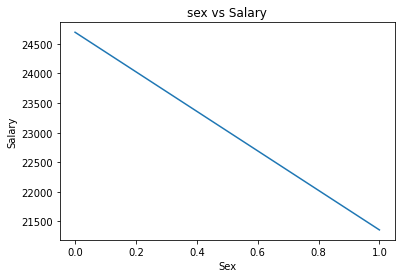

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [ ]:
#df.plot(x = 'Sex', y='Salary', style ='o' )
df.groupby('Sex')['Salary'].mean().plot()

plt.title('sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()
df[['Sex','Salary']].corr()


In [ ]:

df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


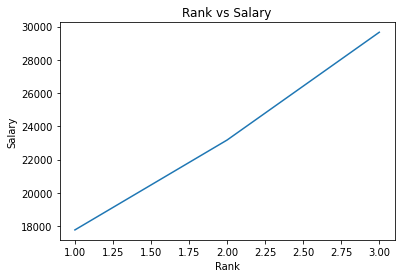

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [ ]:
#df.plot(x = 'Rank', y='Salary', style ='o' )
df.groupby('Rank')['Salary'].mean().plot()
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()
df[['Rank','Salary']].corr()

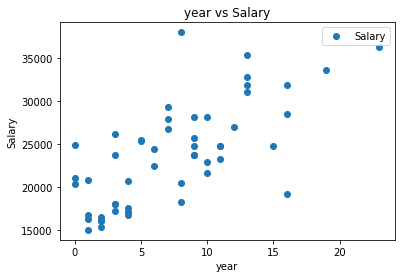

,Year,Salary
Year,1.000000,0.700711
Salary,0.700711,1.000000


In [ ]:
df.plot(x = 'Year', y='Salary', style ='o' )
#df.groupby('Rank')['Salary'].mean().plot()
plt.title('year vs Salary')
plt.xlabel('year')
plt.ylabel('Salary')
plt.show()
df[['Year','Salary']].corr()

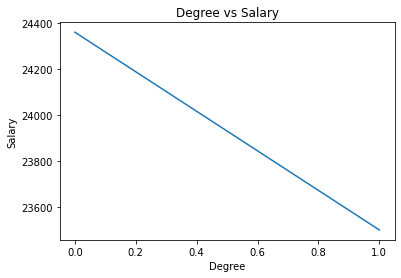

,transform,Salary
transform,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df['transform'] = np.square (df['Degree'])
#df.plot(x = 'Year', y='Salary', style ='o' )
df.groupby('Degree')['Salary'].mean().plot()
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['transform','Salary']].corr()

# There is no linear relationship between degree and the salary in given data tried of transformations 


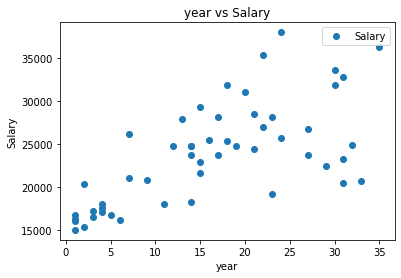

,Year,Salary
Year,1.000000,0.700711
Salary,0.700711,1.000000


In [ ]:
df.plot(x = 'YSdeg', y='Salary', style ='o' )
plt.title('year vs Salary')
plt.xlabel('year')
plt.ylabel('Salary')
plt.show()
df[['Year','Salary']].corr()

In [ ]:
X = df[['Sex','Year','Rank','YSdeg']] #feature 

y =df['Salary'] #target



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
regresor = LinearRegression()
regresor.fit(X_test_scaled,y_test)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regresor.coef_,['Sex','Year','Rank','YSdeg'],columns=['coeffeicent'])
y_pred=regresor.predict(X_test_scaled)
coeff_df

,coeffeicent
Sex,-486.536237
Year,2015.272529
Rank,2901.036538
YSdeg,256.113913


In [ ]:
df =pd.DataFrame({'Actual':y_test,'predicted':y_pred})
df

,Actual,predicted
47,15350,15671.338814
19,24450,25466.432313
45,16094,16744.057276
35,20850,19988.885945
33,20690,20565.548578
14,25748,26608.173175
36,18304,18107.112607
12,28200,26430.499093
13,23712,23287.348359
39,17600,17530.599862


In [ ]:
from sklearn.metrics import r2_score
print('R2_score:',metrics.r2_score(y_test,y_pred))

R2_score: 0.9662242685446097


In [ ]:
#sex is played important role in salary most of the female are geting high salary